In [1]:
import sys
from hwr.data.generator import IAMSequence
from hwr.constants import SPLIT
from hwr.models.ONNET import ONNET
from hwr.decoding.mlf import mlf2txt
from hwr.data.generator import pad_2d
from hwr.models.metrics import character_error_rate, word_error_rate
from hwr.decoding.ctc_decoder import *
from hwr.decoding.trie_beam_search import *
from matplotlib import pyplot as plt
import numpy as np

In [2]:
model = ONNET(preload=True, gru=False, gpu=True)

preloading model weights from /home/jasper/Desktop/fyp/HWR/hwr/../models/iamon/ONNET/pretrained-deep-lstm/weights.h5


In [4]:
test_seq = IAMSequence(SPLIT.TEST, preprocess=6, npz=True, pred=True, inout_ratio=4)
eval_seq = IAMSequence(SPLIT.TEST, batch_size=100, preprocess=6, pred=True, npz=True, pad_to=(900, 225))

In [7]:
model.evaluate(eval_seq, decoder=TrieBeamSearchDecoder(25, lm="sbo", ngram=7, prune=10, trie='100k', gamma=1))

39/39 [==============================] - 4s 108ms/step


100%|██████████| 3855/3855 [42:14<00:00,  1.51it/s]


{'character_error_rate': 0.0620904138705864,
 'word_error_rate': 0.2140849293378476}

In [8]:
model.evaluate(eval_seq, decoder=BestPathDecoder())

39/39 [==============================] - 4s 96ms/step


{'character_error_rate': 0.07925591563475883,
 'word_error_rate': 0.3048912040546299}

1/1 [==============================] - 0s 15ms/step


100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


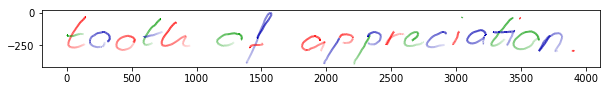

Grouth truth: 
tooth of appreciation . 
Prediction  : 
tooth of precio tion . 
Character error rate: 0.16666666666666666
Word error rate: 0.6666666666666666

1/1 [==============================] - 0s 23ms/step


100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


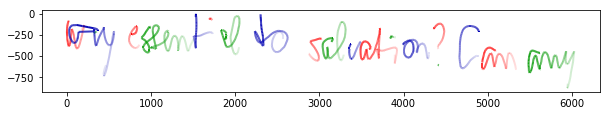

Grouth truth: 
way essential to salvation ? Can any 
Prediction  : 
wery essentiel to salvation ? Can any 
Character error rate: 0.08108108108108109
Word error rate: 0.3333333333333333

1/1 [==============================] - 0s 16ms/step


100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


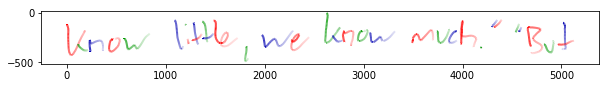

Grouth truth: 
know little , we know much . " " But 
Prediction  : 
know little , we know much But 
Character error rate: 0.16216216216216217
Word error rate: 0.0

1/1 [==============================] - 0s 9ms/step


100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


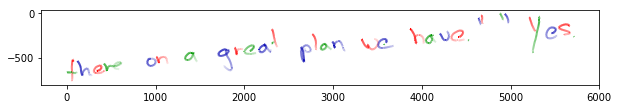

Grouth truth: 
there on a great plan we have . " " Yes . 
Prediction  : 
there on a great plan we have . " " Yes . 
Character error rate: 0.0
Word error rate: 0.0

1/1 [==============================] - 0s 19ms/step


100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


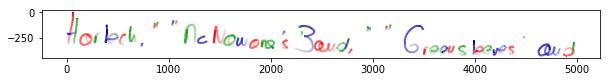

Grouth truth: 
Harlech , " " McNamara's Band , " " Greensleeves " and 
Prediction  : 
Hor tech , " " MaNner 's Band , " " Green steers ' and 
Character error rate: 0.23636363636363636
Word error rate: 0.8333333333333334

1/1 [==============================] - 0s 11ms/step


100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


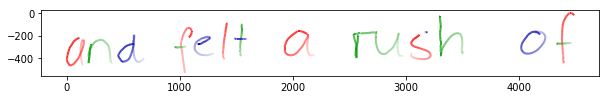

Grouth truth: 
and felt a rush of 
Prediction  : 
and felt a rush of 
Character error rate: 0.0
Word error rate: 0.0

1/1 [==============================] - 0s 16ms/step


100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


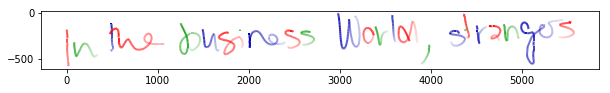

Grouth truth: 
In the business World , strangers 
Prediction  : 
In the business World , strangers 
Character error rate: 0.0
Word error rate: 0.0

1/1 [==============================] - 0s 16ms/step


100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


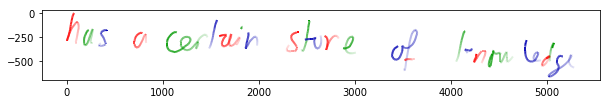

Grouth truth: 
has a certain store of knowledge 
Prediction  : 
has a certain store of land ledge 
Character error rate: 0.12121212121212122
Word error rate: 0.3333333333333333

1/1 [==============================] - 0s 13ms/step


100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


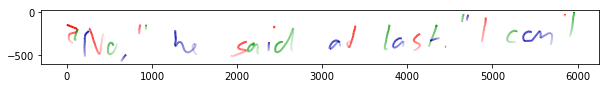

Grouth truth: 
" No , " he said at last . " I can't 
Prediction  : 
" No , " he said at last . " I can ' ' 
Character error rate: 0.08108108108108109
Word error rate: 0.125

1/1 [==============================] - 0s 19ms/step


100%|██████████| 1/1 [00:00<00:00,  2.66it/s]


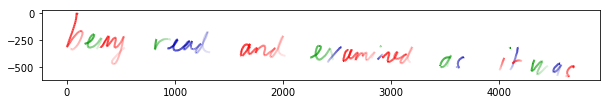

Grouth truth: 
being read and examined as it was 
Prediction  : 
being read and examined as it was 
Character error rate: 0.0
Word error rate: 0.0



(0.08485667485667485, 0.22916666666666669)

In [9]:
# Random samples
n=10
a_cer = 0
a_wer = 0
decoder=TrieBeamSearchDecoder(25, lm="sbo", ngram=7, prune=10, trie='100k', gamma=1)
for _ in range(n):
    features, ground_truth, pointset = eval_seq.random_sample()
    pred = model.predict(features, decoder=decoder)[0]
    pointset.plot_strokes()
    print("Grouth truth: \n{}".format(ground_truth))
    print("Prediction  : \n{}".format(pred))
    cer = character_error_rate([ground_truth], [pred])
    wer = word_error_rate([ground_truth], [pred])
    print("Character error rate: {}".format(cer))
    print("Word error rate: {}".format(wer))
    print()
    a_cer += cer
    a_wer += wer
    
a_cer = a_cer / n
a_wer = a_wer / n
a_cer, a_wer